In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\admin'

In [30]:
data = pd.read_csv(r'C:\Users\admin\Desktop\PROJECTS\House Price Prediction\train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
data.shape

(1460, 81)

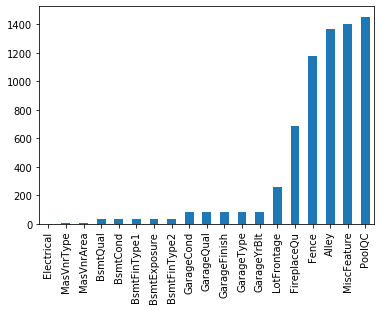

In [7]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

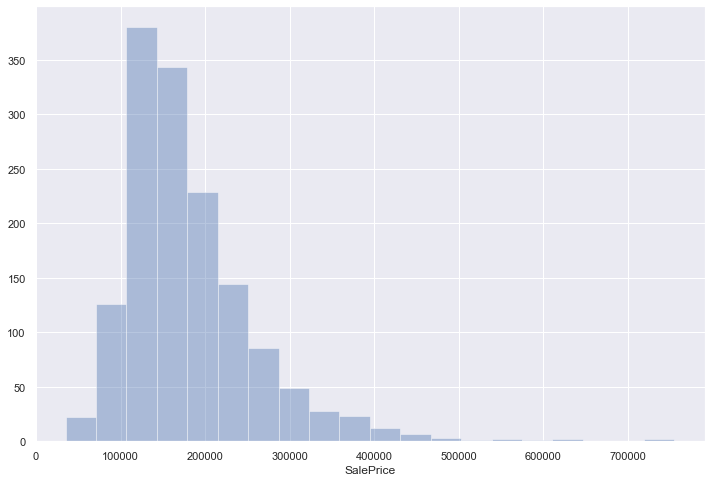

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'], kde=False, bins = 20);

In [9]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

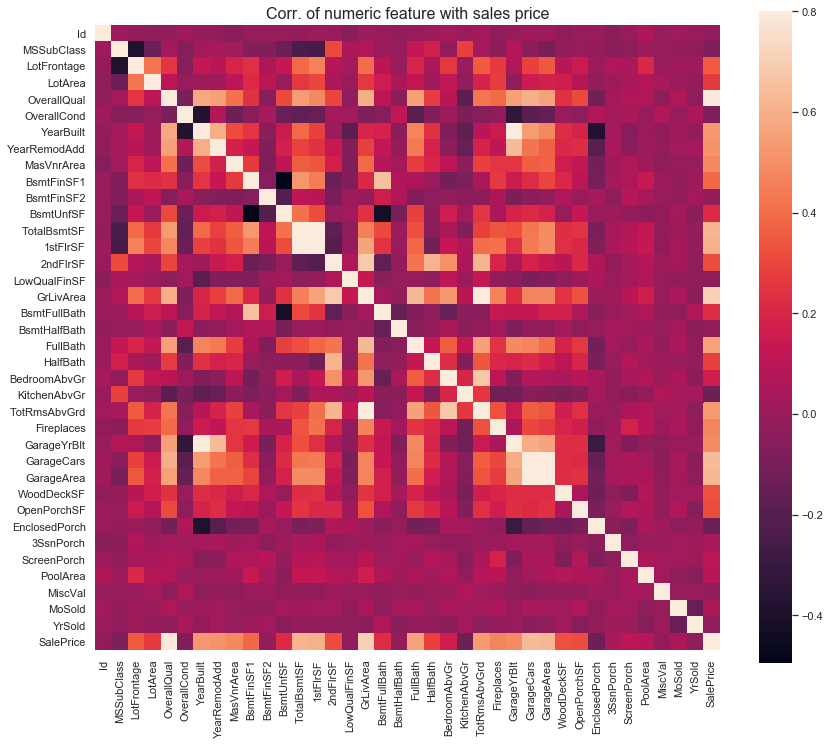

In [13]:
f , ax = plt.subplots(figsize = (14,12))
plt.title ('Corr. of numeric feature with sales price',y=1,size=16)
sns.heatmap(correlation,square = True, vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


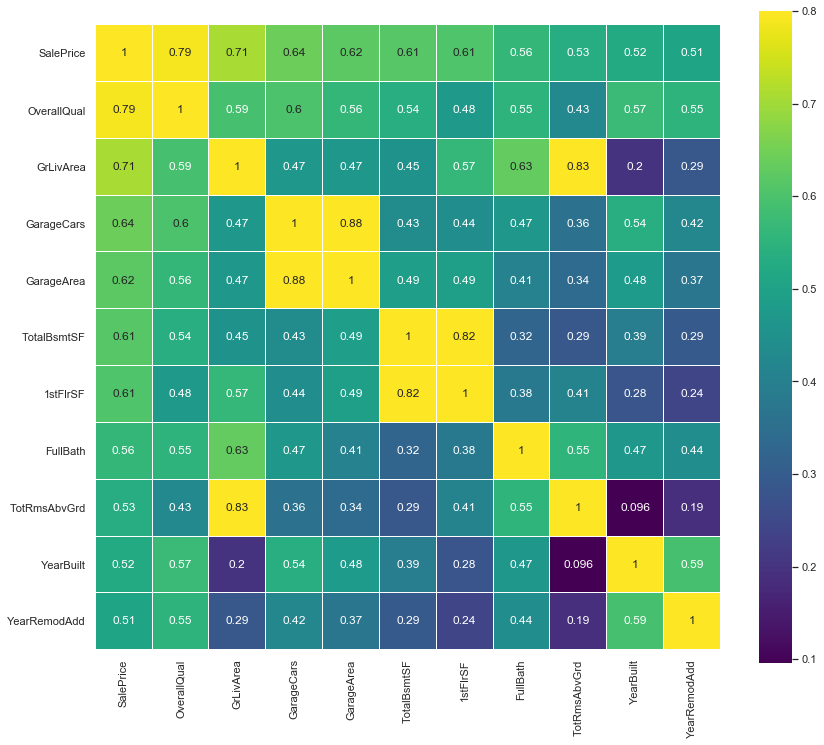

In [14]:
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
           linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

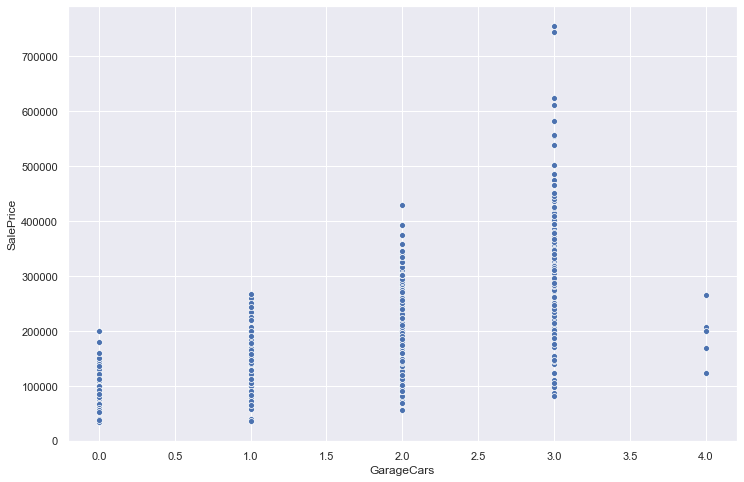

In [15]:
sns.scatterplot(x='GarageCars', y='SalePrice',data= data)


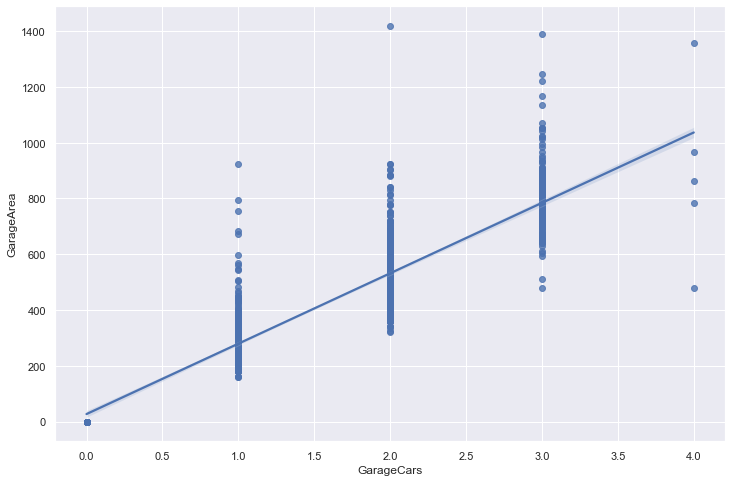

In [16]:
sns.regplot(x='GarageCars',y='GarageArea',data= data,scatter= True, fit_reg=True)

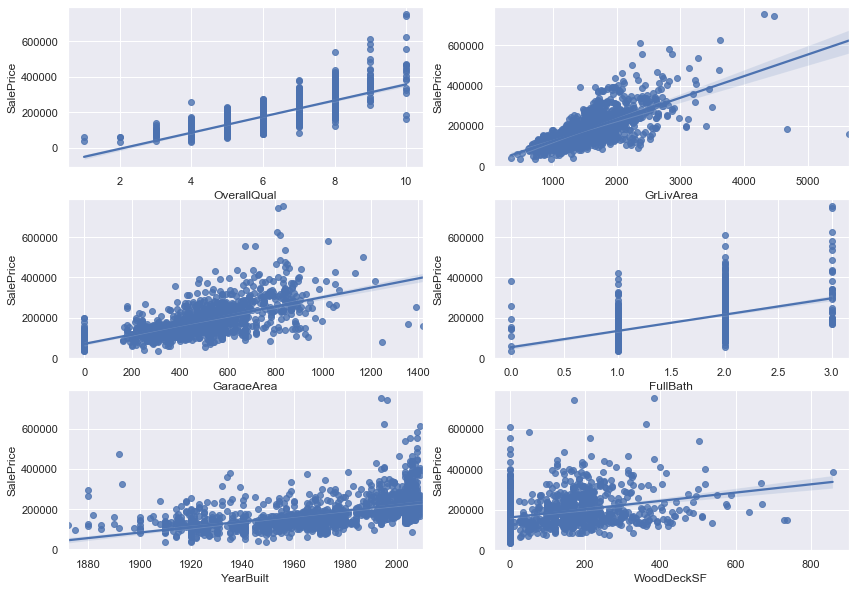

In [17]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))

sns.regplot(x='OverallQual',y='SalePrice',data= data,scatter= True, fit_reg=True, ax=ax1)
sns.regplot(x='GrLivArea',y='SalePrice',data= data,scatter= True, fit_reg=True, ax=ax2)
sns.regplot(x='GarageArea',y='SalePrice',data= data,scatter= True, fit_reg=True, ax=ax3)
sns.regplot(x='FullBath',y='SalePrice',data= data,scatter= True, fit_reg=True, ax=ax4)
sns.regplot(x='YearBuilt',y='SalePrice',data= data,scatter= True, fit_reg=True, ax=ax5)
sns.regplot(x='WoodDeckSF',y='SalePrice',data= data,scatter= True, fit_reg=True, ax=ax6)

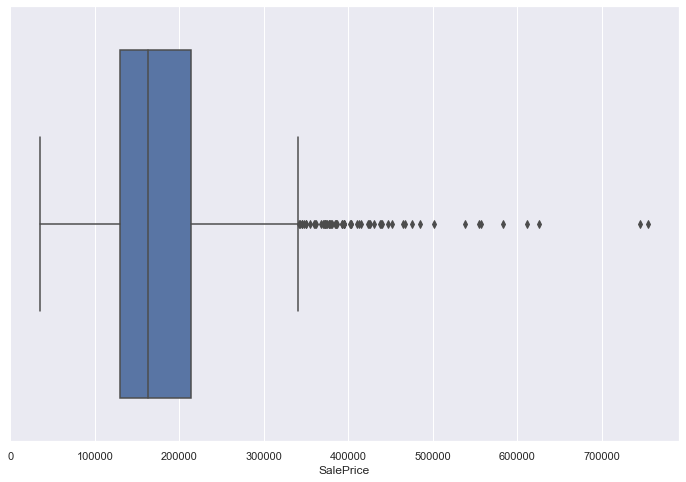

In [18]:
sns.boxplot(x=data["SalePrice"])

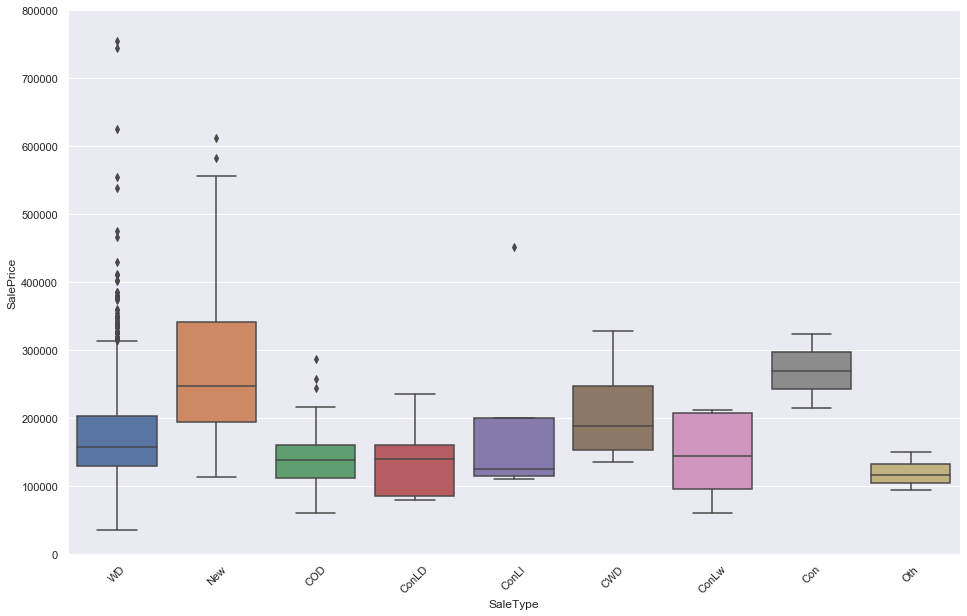

In [19]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='SaleType', y='SalePrice',data= data)
fig.axis(ymin=0, ymax=800000)
xt = plt.xticks(rotation=45)

(-0.5, 9.5, 0, 800000)

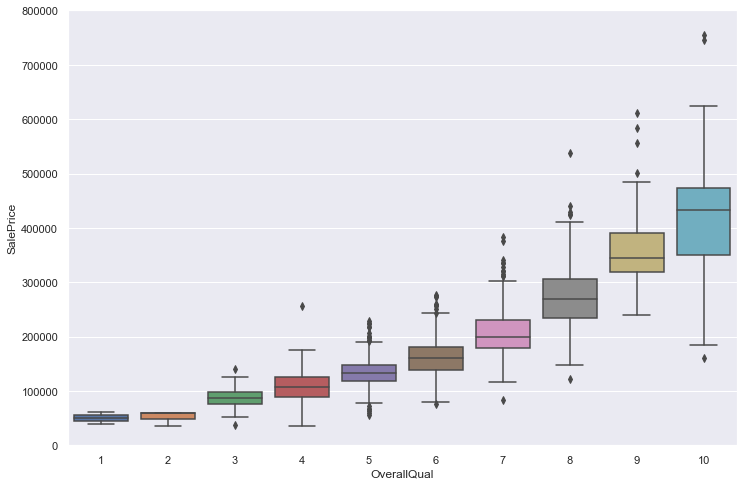

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice',data= data)
fig.axis(ymin=0, ymax=800000)

In [21]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

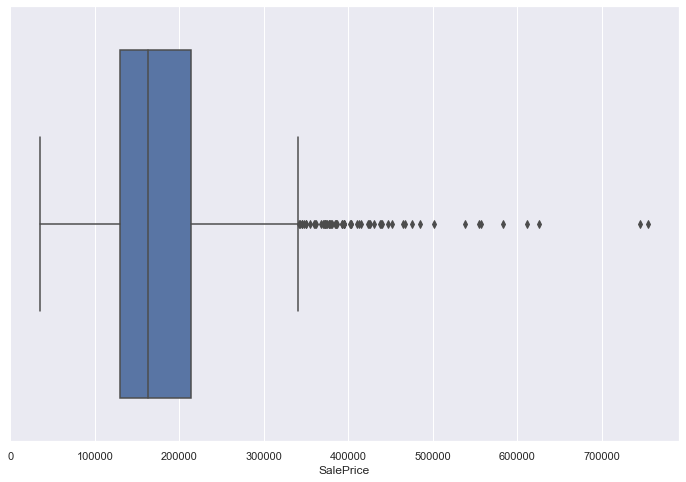

In [22]:
sns.boxplot(x=data['SalePrice'])

In [25]:
data.shape

(1460, 81)

In [26]:
first_quartile = data['SalePrice'].quantile(0.25)
third_quartile = data['SalePrice'].quantile(0.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3*IQR

In [27]:
data.drop(data[data['SalePrice']>new_boundary].index,axis =0,inplace= True)
data.shape

(1448, 81)

In [28]:
cols_to_remove = ['WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath',
                  'BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch',
                  'BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond',    
                  'MSSubClass','EnclosedPorch','KitchenAbvGr']

In [29]:
data.drop(cols_to_remove,axis = 1, inplace= True)